# Cylinder Reflection Illusion (Cylindrical Anamorphosis)
- A novel design for the CV Final Project.
- The idea comes from one of the homeworks: in hw2, we aim to create a good-looking panorama. In the bonus part, I once tried to implement the morphing to a cylinder then back to avoid the cracks and overshadow, but failed to achieve good enough results.
- Now I together with my teammates propose this new way of Cylindrical Reflection Illusion, where the left side of the picture shows a pattern with a small hole in the center, and the right side demonstrates what the observer will see if a cylinder is placed in the very hole.
- Run Instructions (I tested this in Google Colab):
  - switch to GPU
  - run the top 2 cells
  - Restart Runtime and run the rest of the code cells.
  - You can customize the prompts for the flat and cylindrical image, as well as a negative prompt.

In [5]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 37.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.1
    Uninstalling numpy-2.4.1:
      Successfully uninstalled numpy-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.4.3 which is incompatible.
dask-cudf-cu12 25.10.0 requires pandas<2.4.0dev0,>=2.0, but you have pandas 1.4.3 which is incompatible.
access 1.1.10.post3 requires pandas>=2.1.0, but you have pandas 1.4.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.4.3 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
spopt 0.7

In [4]:
%%bash
if [ ! -d ".git" ]; then
    rm -rf * .*; #Get rid of Colab's default junk files
    git clone -b master https://github.com/RyannDaGreat/Diffusion-Illusions .
fi

rm: refusing to remove '.' or '..' directory: skipping '.'
rm: refusing to remove '.' or '..' directory: skipping '..'
Cloning into '.'...


In [5]:
%pip install --upgrade -r requirements.txt
%pip install rp --upgrade
# You may need to restart the runtime after installing these
# I'm not sure why this helps, but all sorts of weird random errors pop up in Colab if you don't

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 38.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
  Using cached oldest_supported_numpy-2023.12.21-py3-none-any.whl.metadata (9.8 kB)
INFO: pip is looking at multiple versions of oldest-supported-numpy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [1]:
# @title 加载 Stable Diffusion 和工具库
import numpy as np
import rp
import torch
import torch.nn as nn
import torch.nn.functional as F
import source.stable_diffusion as sd
from easydict import EasyDict
from source.learnable_textures import LearnableImageFourier
from source.stable_diffusion_labels import NegativeLabel
from itertools import chain
import time

# 初始化 SD 模型
if 's' not in dir():
    model_name="CompVis/stable-diffusion-v1-4"
    gpu='cuda:0'
    s=sd.StableDiffusion(gpu,model_name)
    device=s.device

print("模型加载完成！")

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


[INFO] sd.py: loading stable diffusion...please make sure you have run `huggingface-cli login`.


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

[INFO] sd.py: loaded stable diffusion!
模型加载完成！


In [2]:
# @title Warp Function

def get_cylinder_warp_grid(height, width, device, r_min=0.2, r_max=0.95, view_angle=180):
    """
    hyperparameters:
      r_min: 柱体底部的半径, 圆柱体本身的大小。
      r_max: 图像内容的边缘半径。
      view_angle: 柱面反射覆盖的视角范围 (度)。
    """
    # 创建目标(圆柱视图)的坐标网格
    # Y轴: 从底部(-1)到顶部(1) -> 对应物理世界的 半径 r_min 到 r_max
    # X轴: 从左(-1)到右(1) -> 对应物理世界的 角度
    ny, nx = height, width
    y_range = torch.linspace(-1, 1, ny, device=device)
    x_range = torch.linspace(-1, 1, nx, device=device)
    uy, ux = torch.meshgrid(y_range, x_range, indexing='ij')

    # Map X to Theta
    # The pattern will be facing the observer
    angle_rad = torch.deg2rad(torch.tensor(view_angle / 2))
    theta = ux * angle_rad - (torch.pi / 2.0)

    # Map Y to Radius
    radius = r_min + ((uy + 1) / 2) * (r_max - r_min)

    # change to x, y
    sample_x = radius * torch.cos(theta)
    sample_y = radius * torch.sin(theta)

    # 堆叠为 (Batch, H, W, 2)
    grid = torch.stack((sample_x, sample_y), dim=-1).unsqueeze(0)

    return grid

print("几何变换函数已定义。")

几何变换函数已定义。


In [3]:
# @title Prompts
# Flat Pattern Prompts
prompt_flat = "a colorful persian rug pattern, top down view, high quality, intricate details"

# Cylindrical Prompts
prompt_cylinder = "a cute robot face, cyberpunk style, 3d render"

# negative prompt
negative_prompt = "blurry, low quality, distortion, ugly, text, watermark"

CYLINDER_RADIUS = 0.2  # how much the black hole(where the cylinder will be) accounts for the whole image
IMAGE_SIZE = 512

print(f"Flat Prompt: {repr(prompt_flat)}")
print(f"Cylinder Prompt: {repr(prompt_cylinder)}")

# ids
label_flat = NegativeLabel(prompt_flat, negative_prompt)
label_cyl = NegativeLabel(prompt_cylinder, negative_prompt)

# Initialize, use Fourier
learnable_image_maker = lambda: LearnableImageFourier(height=IMAGE_SIZE, width=IMAGE_SIZE, num_features=256, hidden_dim=256, scale=20).to(s.device)
image_flat_param = learnable_image_maker()

# Initialize the optimizers
params = chain(image_flat_param.parameters())
optim = torch.optim.SGD(params, lr=1e-4)

# generate the grid
warp_grid = get_cylinder_warp_grid(IMAGE_SIZE, IMAGE_SIZE, s.device, r_min=CYLINDER_RADIUS, r_max=0.98).to(s.device)

Flat Prompt: 'a colorful persian rug pattern, top down view, high quality, intricate details'
Cylinder Prompt: 'a cute robot face, cyberpunk style, 3d render'


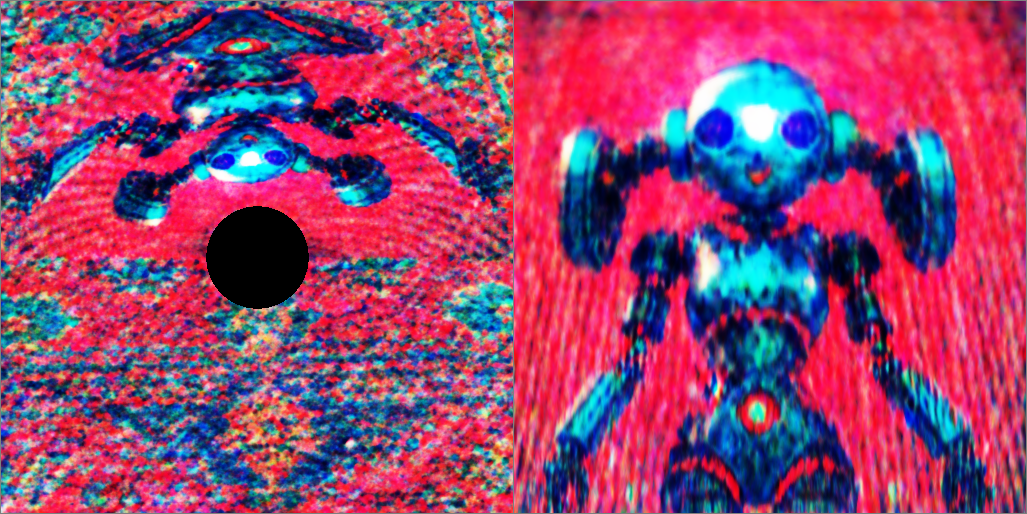

Iteration: 400
Status: : ETR=2:24:19.826216    ETA=2:47:00.047690      T=0:22:40.221474        Progress: 543/4000      RATE=0.40/s

In [ ]:
# @title Main Loop

NUM_ITER = 4000
DISPLAY_INTERVAL = 200

display_eta = rp.eta(NUM_ITER, title='Status: ')
ims = []

print('开始训练... 左图为平面打印图，右图为圆柱反射效果。')

try:
    for iter_num in range(NUM_ITER):
        display_eta(iter_num)

        # Get Image
        flat_img = image_flat_param() # (C, H, W)

        # Perform Reflection, keep the grads
        reflected_img = F.grid_sample(flat_img.unsqueeze(0), warp_grid, align_corners=True).squeeze(0)

        # Compute SDS Loss
        # For prompt_flat
        s.train_step(
            label_flat.embedding,
            flat_img.unsqueeze(0),
            noise_coef=0.1,
            guidance_scale=50
        )
        # For prompt_cylinder
        s.train_step(
            label_cyl.embedding,
            reflected_img.unsqueeze(0),
            noise_coef=0.1,
            guidance_scale=80
        )

        # print out the
        with torch.no_grad():
            if iter_num % DISPLAY_INTERVAL == 0:
                from IPython.display import clear_output
                clear_output(wait=True)

                # Show
                disp_flat = rp.as_numpy_image(flat_img)
                disp_ref = rp.as_numpy_image(reflected_img)

                # Give out the black whole in the middle for the left half
                h, w = disp_flat.shape[:2]
                y, x = np.ogrid[:h, :w]
                mask = (x - w/2)**2 + (y - h/2)**2 <= (h/2 * CYLINDER_RADIUS)**2
                disp_flat_vis = disp_flat.copy()
                disp_flat_vis[mask] = 0

                combined = rp.tiled_images([disp_flat_vis, disp_ref])
                rp.display_image(combined)
                print(f"Iteration: {iter_num}")

        # param-step
        optim.step()
        optim.zero_grad()

except KeyboardInterrupt:
    print('用户手动停止。')

# For the last Demonstration
flat_img = image_flat_param()
reflected_img = F.grid_sample(flat_img.unsqueeze(0), warp_grid, align_corners=True).squeeze(0)
disp_flat = rp.as_numpy_image(flat_img)
disp_ref = rp.as_numpy_image(reflected_img)

print("最终结果：")
rp.display_image(rp.tiled_images([disp_flat, disp_ref]))

In [ ]:
# @title Save the image

import cv2

final_flat = rp.as_numpy_image(image_flat_param())
h, w = final_flat.shape[:2]
y, x = np.ogrid[:h, :w]
mask = (x - w/2)**2 + (y - h/2)**2 <= (h/2 * CYLINDER_RADIUS)**2
final_flat_print = final_flat.copy()
# final_flat_print[mask] = 0 # keep the middle blank

file_name = "cylinder_illusion_flat.png"
rp.save_image(final_flat_print, file_name)